In [1]:

%matplotlib inline
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\user1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
df = pd.read_csv('PassengerTrips.csv')
print(df.head())

       Date  Boardings
0  7/1/2017    16425.0
1  7/2/2017    12268.0
2  7/3/2017    46379.0
3  7/4/2017    49683.0
4  7/5/2017    48810.0


In [7]:
df['Date']=pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [11]:
df=df.set_index(['Date'])

In [39]:
monthSum = df.groupby([lambda x: x.year, lambda x: x.month]).sum()

In [40]:
monthSum

Boardings
2017 7   1427054.0
     8   1823459.0
     9   1529220.0
     10  1661471.0
     11  1681459.0
     12  1144827.0
2018 1   1117383.0
     2   1672927.0
     3   1855794.0
     4   1505432.0
     5   1904807.0
     6   1618783.0
     7   1548518.0
     8   1930230.0
     9   1699574.0
     10  1724221.0
     11  1775505.0
     12  1205370.0
2019 1   1132708.0
     2   1668004.0
     3   1869379.0
     4   1576954.0
     5   2245204.0
     6   1762177.0
     7   1791783.0
     8   2039252.0
     9   1924132.0
     10  1911803.0
     11  1913390.0
     12  1414379.0
2020 1   1250100.0
     2   1968837.0
     3   1444381.0
     4    296287.0
     5    558209.0
     6    923840.0
     7    981173.0
     8    211779.0

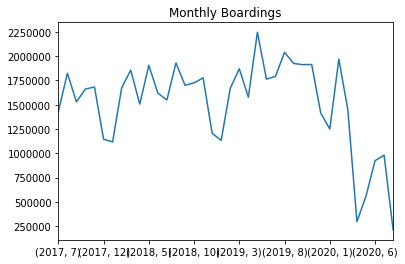

In [41]:
monthSum['Boardings'].plot(title='Monthly Boardings')

In [36]:
# MultiIndex to SingleIndex
monthSum_1 = monthSum.reset_index(level=[0])
# Int64index to Date
monthSum_1.index = monthSum_1.date

AttributeError: 'DataFrame' object has no attribute 'date'

In [35]:
decomposition = seasonal_decompose(monthSum_1['Boardings'], freq=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(24, 18)

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'